In [87]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import DataLoader
from utils.dataset import arc_dataset
from utils.model import UNet
from matplotlib import pyplot as plt

data = arc_dataset('./data/train/full_out/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


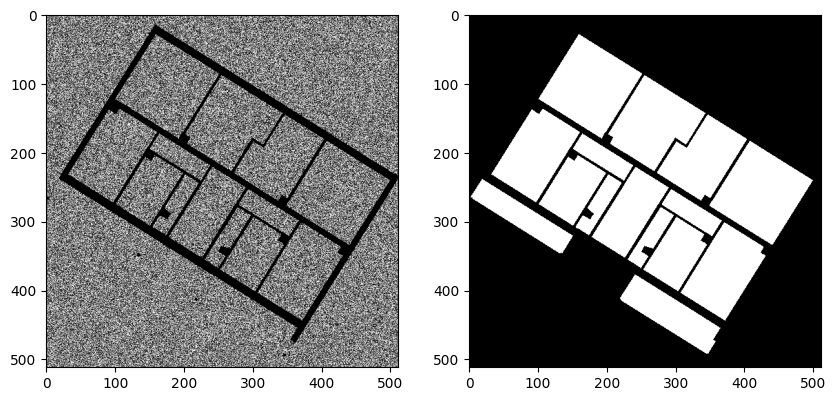

In [88]:
data.random_show_data()

In [89]:
from PIL import Image
import numpy as np
image = Image.open('./data/image data/01.jpg')
image = image.convert('L')
image = np.array(image)
image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()

In [90]:
model = UNet(1,2)
model.load_state_dict(torch.load('./best_model.pth'))
model.eval()
output = model(image)

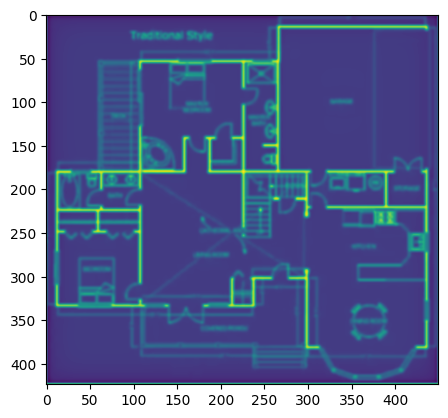

In [91]:
plt.imshow(output[0][1].detach().numpy())